In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [72]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')
df


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [9]:
# Исследование размерности данных

print(f'Размерность данных:\n{df.shape}\n')


Размерность данных:
(1303, 13)



In [10]:
# Исследование на типы данных

print('Типы данных по столбцам:')
coltype = dict()
for i in df.columns:
    coltype[i] = type(df.loc[0,i])
    print(f'{i} : {coltype[i]}')


Типы данных по столбцам:
laptop_ID : <class 'numpy.int64'>
Company : <class 'str'>
Product : <class 'str'>
TypeName : <class 'str'>
Inches : <class 'numpy.float64'>
ScreenResolution : <class 'str'>
Cpu : <class 'str'>
Ram : <class 'str'>
Memory : <class 'str'>
Gpu : <class 'str'>
OpSys : <class 'str'>
Weight : <class 'str'>
Price_euros : <class 'numpy.float64'>


In [188]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Исследование на пропуски:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64



Text(0.5, 1.0, 'Количество пустых значений в данных')

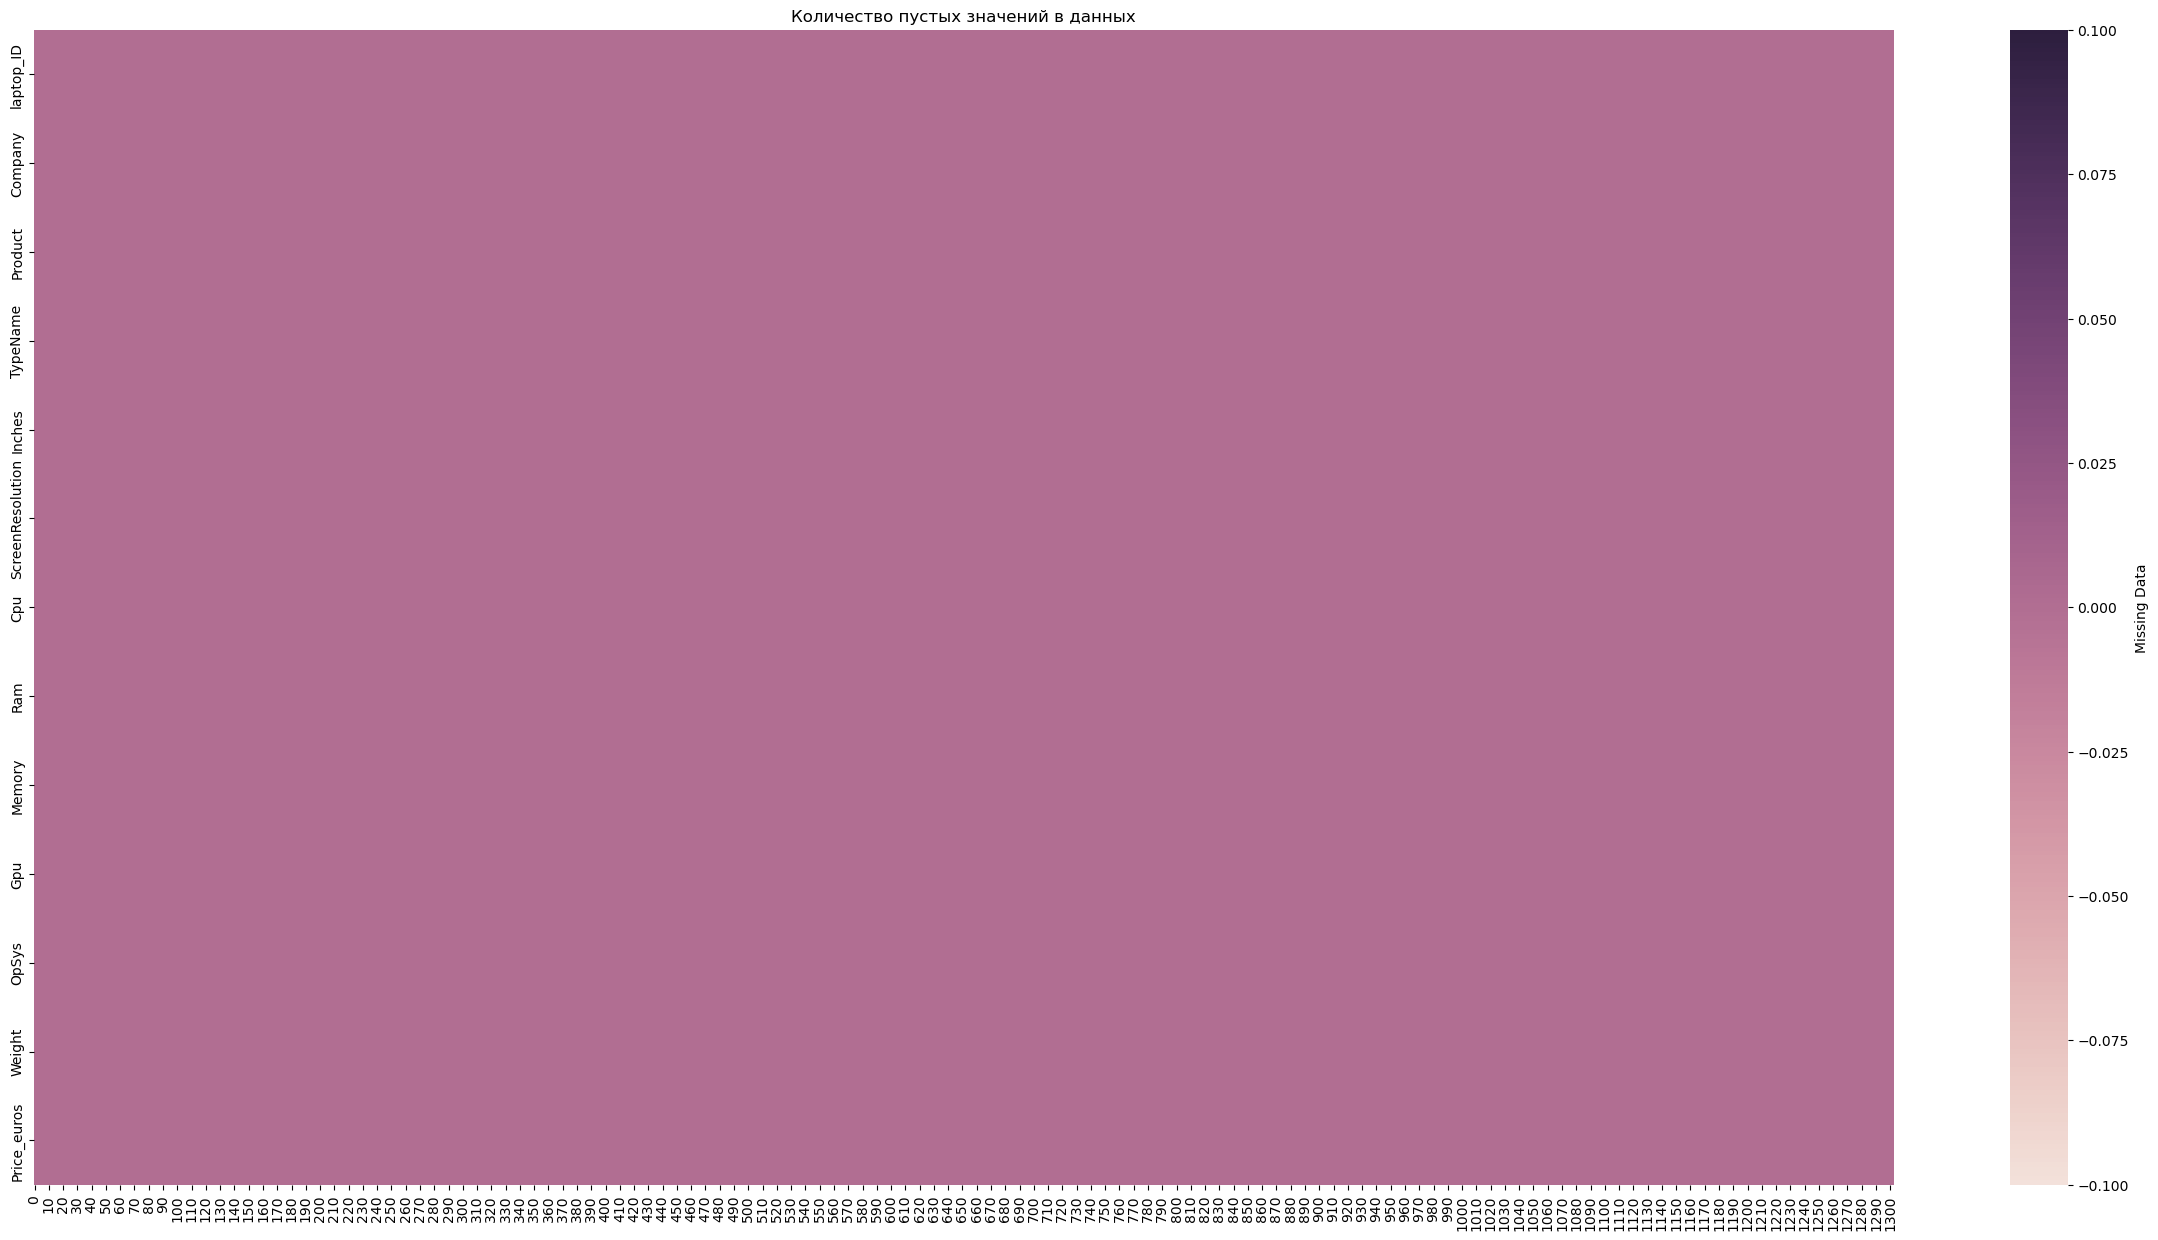

In [15]:
# Исследование на пропуски в данных

print(f'Исследование на пропуски:\n{df.isna().sum()}\n')

plt.figure(figsize=(30,15))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

plt.title('Количество пустых значений в данных')


In [183]:
# Датафрейм для исследования на аномальные значения, выбросы

a = pd.Series(df['Ram'],copy=True)
b = pd.Series(df['Weight'],copy=True)
for i in range(df.shape[0]):
    a[i] = a[i][:-2]
    b[i] = b[i][:-2]

df2 = pd.concat([df['Inches'], a],axis=1)
df2 = pd.concat([df2, b],axis=1)
df2 = pd.concat([df2, df['Price_euros']],axis=1)
df2['Ram'] = pd.to_numeric(df2['Ram'])
df2['Weight'] = pd.to_numeric(df2['Weight'])
df2


,Inches,Ram,Weight,Price_euros
0,13.3,8,1.37,1339.69
1,13.3,8,1.34,898.94
2,15.6,8,1.86,575.00
3,15.4,16,1.83,2537.45
4,13.3,8,1.37,1803.60
...,...,...,...,...
1298,14.0,4,1.80,638.00
1299,13.3,16,1.30,1499.00
1300,14.0,2,1.50,229.00
1301,15.6,6,2.19,764.00


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

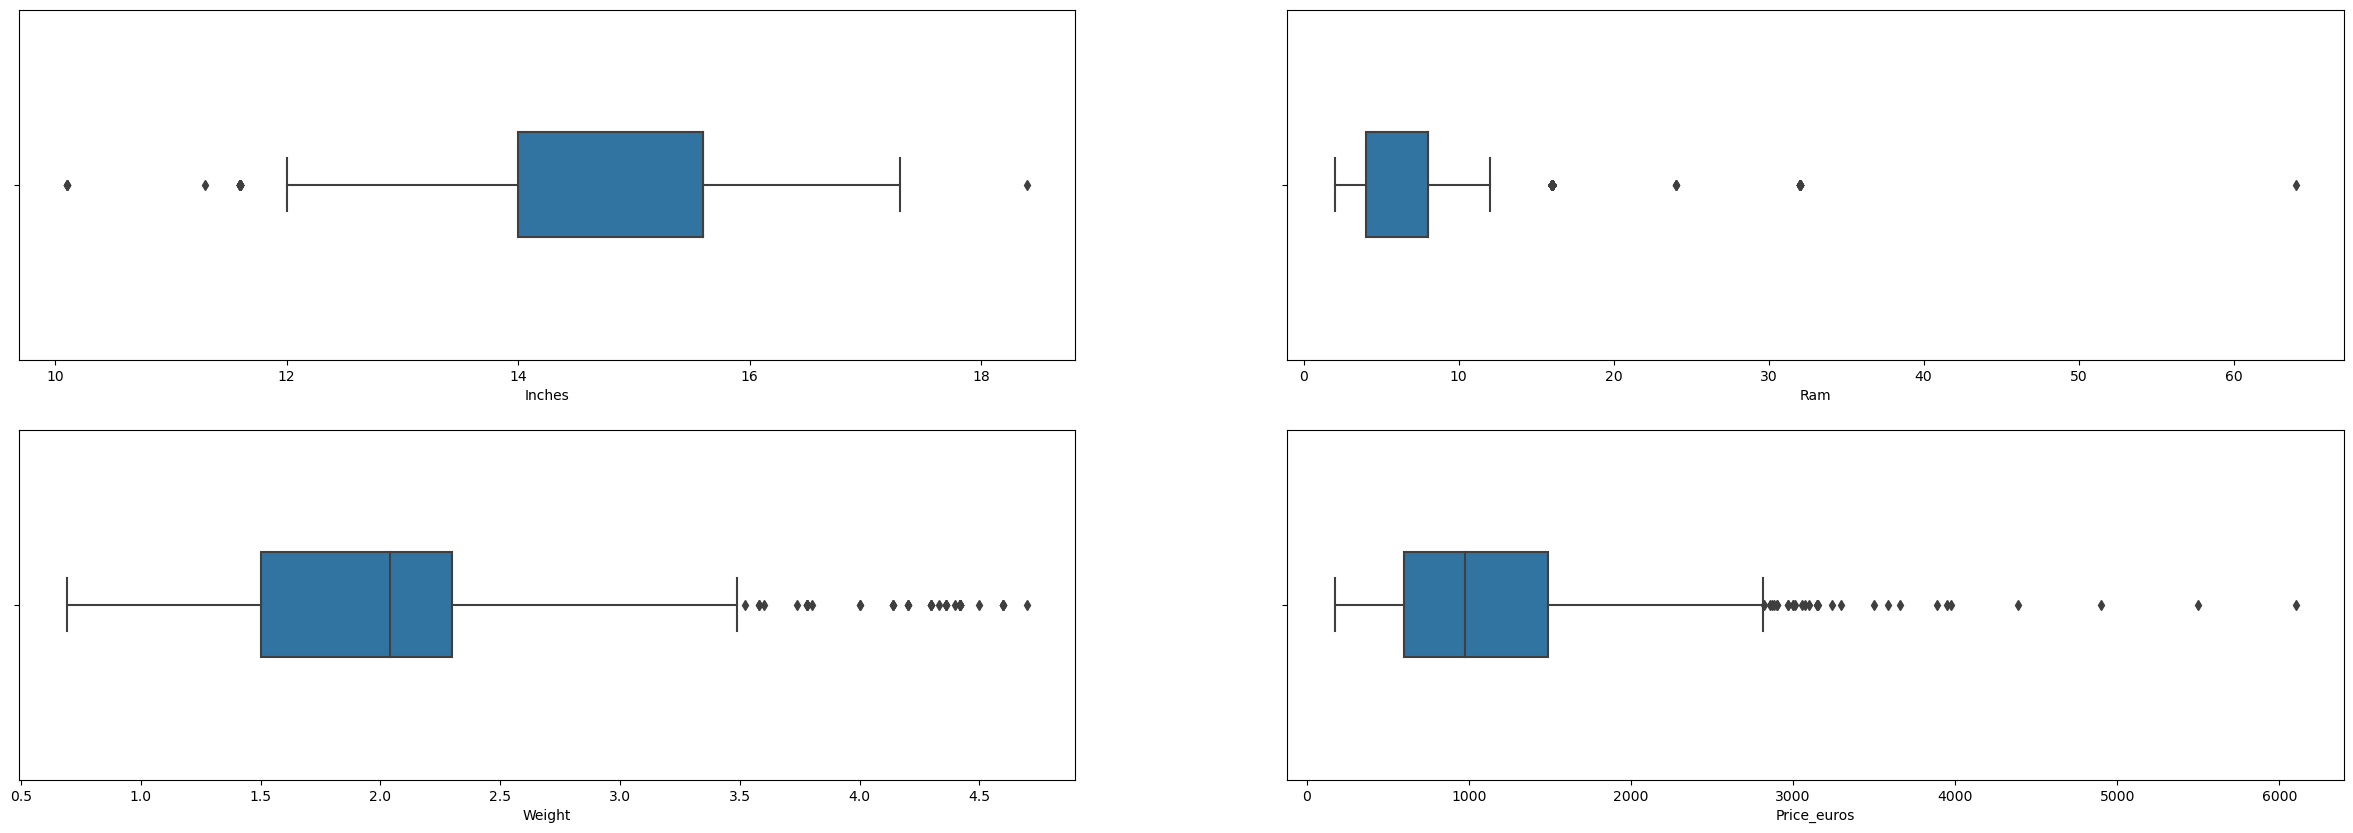

In [109]:
# Исследование на аномальные значения, выбросы

figure, axes = plt.subplots(2,2,figsize=(30,10))

for i in range(4):
    sns.boxplot(df2[df2.columns[i]], ax=axes[i//2][i%2], width=0.3)


In [99]:
# Ислледование на дубликаты

print('Количество уникальных значений по столбцам:')
dupl = dict()
for i in df.columns:
    dupl[i] = len(np.unique(df.loc[:,i]))
    print(f'{i} : {dupl[i]}')


Количество уникальных значений по столбцам:
laptop_ID : 1303
Company : 19
Product : 618
TypeName : 6
Inches : 18
ScreenResolution : 40
Cpu : 118
Ram : 9
Memory : 39
Gpu : 110
OpSys : 9
Weight : 179
Price_euros : 791


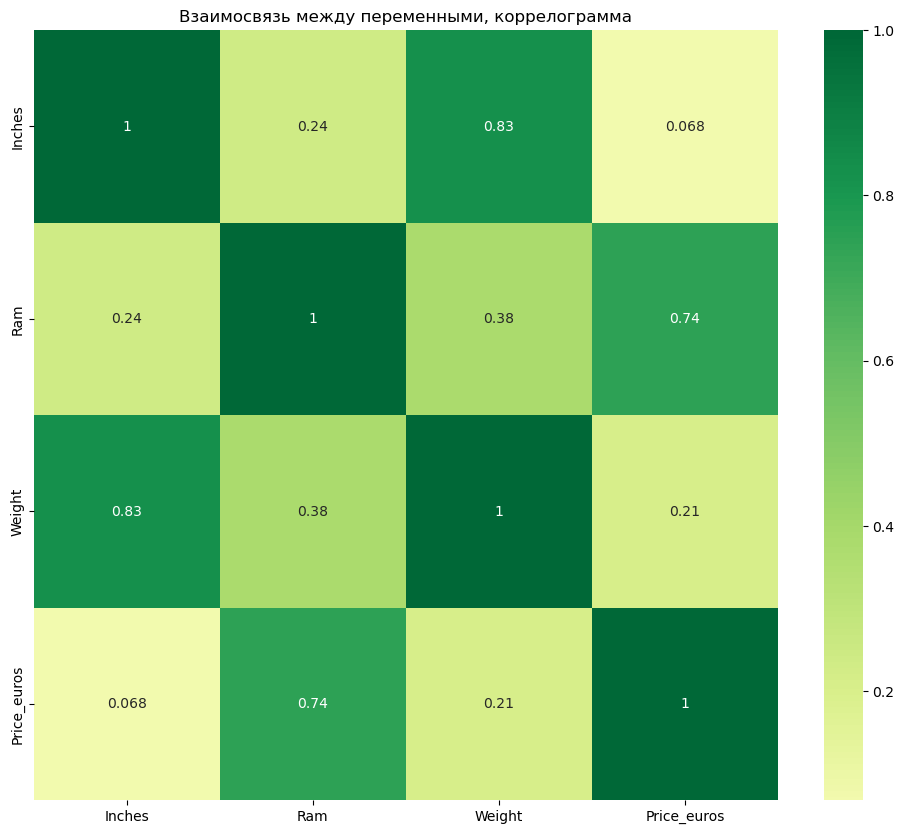

In [184]:
# Исследование взаимосвязи между переменными

plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Взаимосвязь между переменными, коррелограмма')
plt.show()


In [148]:
x = df2[['Inches','Ram','Weight']]
y = df['Price_euros']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train)
print(y_train)


      Inches Ram Weight
36      15.6   4    2.1
983     15.6   4    2.3
484     15.6   4    2.3
312     15.6  16    2.8
181     13.3   8   1.23
...      ...  ..    ...
1219    14.0   8    1.2
167     15.6   8   2.56
735     15.6   4   1.85
1115    13.3   8   1.23
615     17.3   8    3.0

[912 rows x 3 columns]
36       367.00
983      649.00
484      565.00
312     2099.00
181     1399.00
         ...   
1219    1149.00
167     1060.49
735      779.00
1115    1379.00
615     1168.00
Name: Price_euros, Length: 912, dtype: float64


In [149]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [150]:
w0 = model.intercept_
print('Свободный коэффицент уравнения w0:')
print(w0)


Свободный коэффицент уравнения w0:
1186.9920961721466


In [192]:
w1 = model.coef_
print('Веса всех признаков (w1): ')
print(w1)


Веса всех признаков (w1): 
[-74.47736295 111.0383565   61.03649186]


In [193]:
print('Уравнение линейной регресии в общем виде: y = w1 * x + w0')
print(f'Уравнение линейной регрессии в текущей задаче: y = {w1[0]} * x1 + {w1[1]} * x2 + {w1[2]} * x3 + {w0}')


Уравнение линейной регресии в общем виде: y = w1 * x + w0
Уравнение линейной регрессии в текущей задаче: y = -74.47736295359482 * x1 + 111.0383565007552 * x2 + 61.036491855259015 * x3 + 1186.9920961721466


In [195]:
y_pred = model.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean Absolute Error: 346.10306321409837
Mean Squared Error: 240647.9184071358
R2 score: 0.46869895232500236


In [175]:
model2 = LinearRegression()
x_train_0 = np.array(x_train['Inches']).reshape(-1,1)
model2.fit(x_train_0, y_train)

LinearRegression()

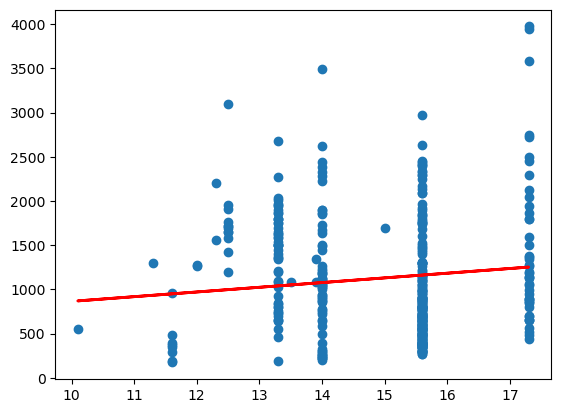

In [201]:
x_test_0 = np.array(x_test['Inches']).reshape(-1,1)
y_pred2 = model2.predict(x_test_0)
plt.scatter(x_test_0, y_test)
plt.plot(x_test_0, y_pred2, color='red', linewidth=2);
plt.show()


In [203]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('R2 score:', r2_score(y_test, y_pred2))

Mean Absolute Error: 552.0851743789442
Mean Squared Error: 462371.0892545648
R2 score: 0.02082014987541947
